<a href="https://colab.research.google.com/github/a-forty-two/AIOpenAI22Jan24/blob/main/AiOpenAI004_IntroToML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Perform ML-> clean, complete data
# how to clean and what to complete? -> exploration
# visual, statistical, log analysis!
# Python, Power BI, Tableau, Excel....

In [2]:
data_path = 'https://raw.githubusercontent.com/a-forty-two/AIOpenAI22Jan24/main/data.csv'
import pandas as pd
data = pd.read_csv(data_path)
data.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [3]:
# unique values in each column
for col_name in data.columns:
  print(col_name + ' : ', end=' ')
  print(data[col_name].value_counts().count())

id :  569
diagnosis :  2
radius_mean :  456
texture_mean :  479
perimeter_mean :  522
area_mean :  539
smoothness_mean :  474
compactness_mean :  537
concavity_mean :  537
concave points_mean :  542
symmetry_mean :  432
fractal_dimension_mean :  499
radius_se :  540
texture_se :  519
perimeter_se :  533
area_se :  528
smoothness_se :  547
compactness_se :  541
concavity_se :  533
concave points_se :  507
symmetry_se :  498
fractal_dimension_se :  545
radius_worst :  457
texture_worst :  511
perimeter_worst :  514
area_worst :  544
smoothness_worst :  411
compactness_worst :  529
concavity_worst :  539
concave points_worst :  492
symmetry_worst :  500
fractal_dimension_worst :  535
Unnamed: 32 :  0


In [4]:
# any null values or missing values
data.info()

# if there was data missing-> remove it or replace it
# if removing-> remove entire row; entire column
# if replacing-> mean, median, mode or a custom value!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.columns
# we should remove this extra unnamed:32 column
# columns are currupted and full of null values-> remove!

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data = data.iloc[:, :-1 ]
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# comparing columns amongst themselves
# very high correlation; very low correlation
# if a correlation is tending to 0-> we can remove that column!
#  Pos-> a increases so b increases;
#   Neg-> a decreases if b increases;
#   Zero-> a and b are independent; nothing happens if other changes!
# if something is 0 correlated-> we may not need it in ML!

In [8]:
# Correlation
# too much data to understand; best is to visualize it!

corrs = data.corr()
corrs


<ipython-input-8-bbb9f79ad521>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = data.corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

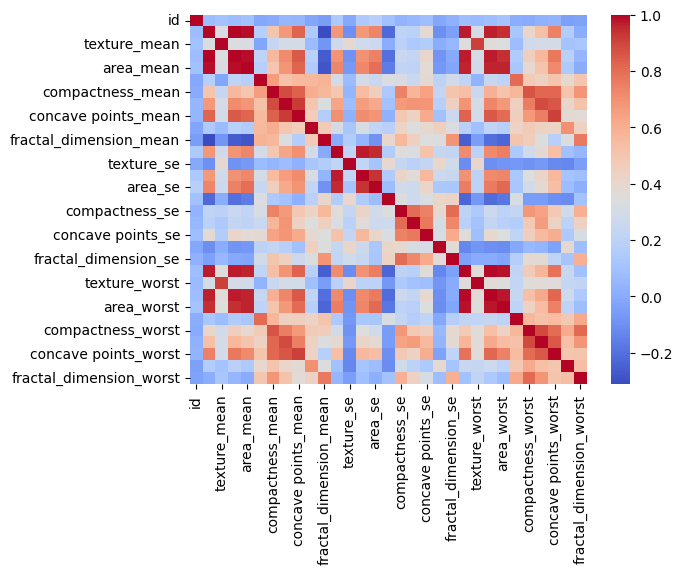

In [9]:
import seaborn as sns
sns.heatmap(corrs, cmap='coolwarm')

Observe the row and column of ID-> it has tending to 0 correlation with every other column-> proving the point, that it SHOULD NOT participate in ML!


Challenge-> we cannot del it either! If we lose ID, then we don't know the identity/ownership of that record!

In [10]:
# for such columns, id, empid, caseid, roll_num->
# convert into INDEX!

In [11]:
mydata = data.set_index('id')
mydata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Figure size 640x480 with 0 Axes>

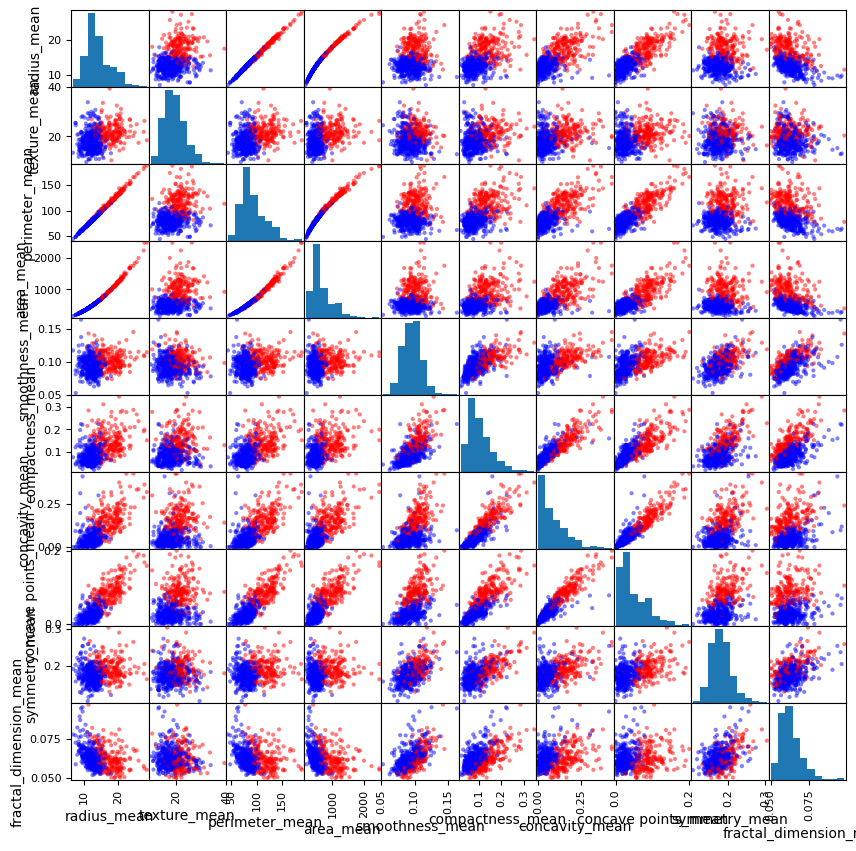

In [12]:
#Analyze inputs v/s their class distributions!

import matplotlib.pyplot as plt
plt.figure() # CLEAN the graph buffer before writing anything into it
inputs = mydata.iloc[:, 1:11]

# logic -> 'M' - red, 'B' - blue
logic = lambda val: 'red' if val=='M' else 'blue'

diagnosis_encoded = mydata['diagnosis'].map(logic)

sm = pd.plotting.scatter_matrix(inputs, c=diagnosis_encoded, figsize=(10,10))
plt.show()

In [13]:
# radius, perimeter and area

# permutations-> 3 diff models-> keep algo and HPs constant
# then select the best model

# PCA or LDA -> instead of going with original inputs,
# we form more complex inputs and combine them



<ipython-input-14-64528acd6742>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
<ipython-input-14-64528acd6742>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='b

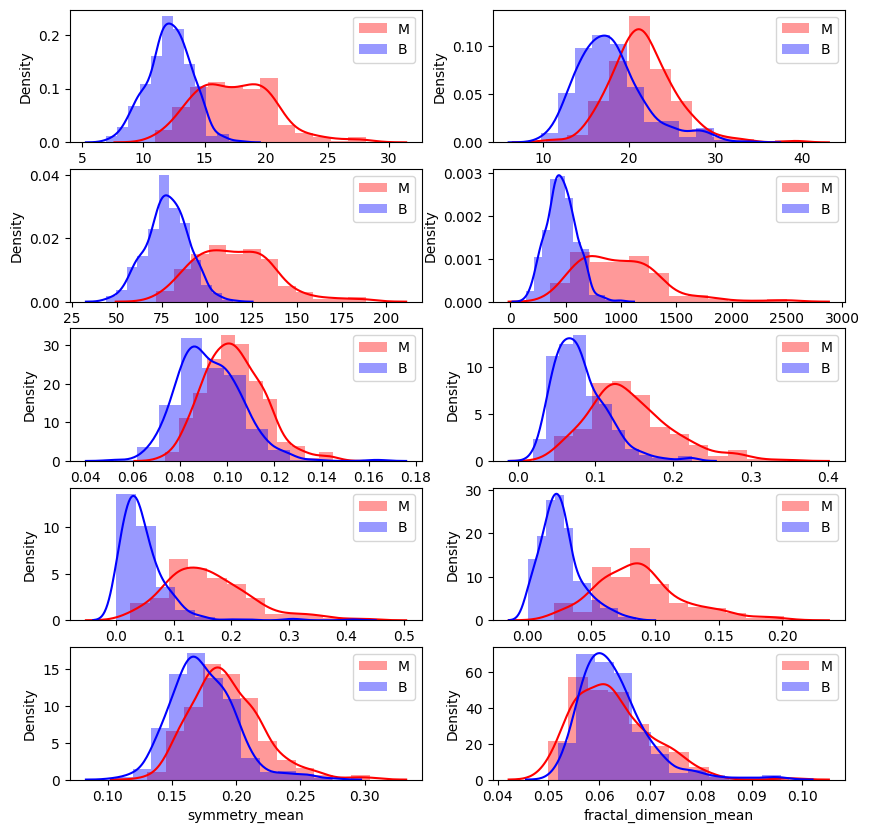

In [14]:
# class imbalance; good features v/s bad features

# distribution-> between 'M' and 'B' cells
# if there is TOO much overlap in their values, we
# have very little scope to learn
# if there is considerable distance between these 2
# distributions, we may be able to come up with a
# boundary that separates them

bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(inputs.columns):
  rows = 5
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')

plt.show()

In [15]:
# Cloud Accounts-> Microsoft Azure
# Automated ML on Azure/GCP/ScikitLearn-> Interpretation
#       Global Feature Importance
#       Local Feature Importance


In [16]:
# Features are derived out of dimensions

# original dimension-> radius, peri, area
# features-> f1(f1(r,p,a)), f2 (f2(r,p,a))
# PCA/LDA -> lot of memory;lot of time;very good results

# permutation based features-> same memory; lot more time;
#          BEST POSSIBLE TIME
# f1,f2,f3 ->(f1),(f2),f3,(f1,f2),(f2,f3),(f3,f1),(f1,f2,f3)

# Automated ML-> interpretation and explanation


In [17]:
mydata.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [19]:
x = mydata.loc[:, features]
y = mydata.loc[:, ['diagnosis']]

In [20]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Why are large and small numbers in the same dataset a problem?



y = m1x1 + m2x2... mnxn + c

if x1 was in millions, while others were between 1-100, the equation will ALWAYS skew in favor of x1


happiness = f(money, age)

age-> 1 to 100

money-> -1 billion to +1 billion

In [21]:
# () []
# ( ) -> excluding
# [ ] -> including
# answer is between (1,3) -> its > 1, < 3 but not 1 or 3
# answer is between [1,3] -> its >=1 and <=3


In [22]:
# Data Normalization
# favorable scales where math fits!
# (-inf,0) -> separate math
# [0] -> separate math
# (0,1) -> separate math
# [1,inf) -> separate math

# Popular scales:
# MinMax -> [0,1] -> smallest becomes 0, largest 1
#        -> (data-min)/(max-min)
#       colors-> pixel = [0,255]
#       (pixel - 0)/(255- 0) = pixel/255

# Sigmoid (probability) -> [0,1]

# tanh (classification) -> (-1, 1) [IGNORE OUTLIERS]
#

# z-score (profit/loss | outlier detection)
#         -> (data-mean)/standard_deviation
#         -> (-inf, inf) from which we remove all
#             values greater than +3 and < -3
#

In [23]:
# SoftPlus -> cat=10, dog=20, cow=30
# 10+20+30 = 60
# SoftMax = [10/60, 20/60, 30/60]

In [24]:
y.head()

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [25]:
# looked at our data -> divided into X and Y
# inputs and labels

# ML-> requires ONLY NUMBERS!
# X-> i need values in the same scale
# Y-> i need numbers not M and B

In [26]:
encoder = lambda diag: 1 if diag=='M' else 0
y['diagnosis'] = y['diagnosis'].map(encoder)

In [28]:
y.tail()

,diagnosis
id,
926424,1
926682,1
926954,1
927241,1
92751,0


In [34]:
#Normalized
# Z-score -> (data-mean)/std -> (data-mu)/sigma
# before normalizing-> divide your data into 2 or 3 parts
# either-> training and testing (scoring)
# or -> training, testing (scoring) and validation

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,
                                          y,
                                        test_size=0.2,
                                      random_state=42)

In [31]:
x.describe().T # transpose-> rows become columns and vice versa

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [38]:
stats = xtrain.describe().T
mu = stats['mean']
sigma = stats['std']


In [39]:
xtrain_norm = (xtrain-mu)/sigma
xtest_norm = (xtest-mu)/sigma

In [41]:
xtrain_norm.head() # -inf to +inf

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
859471,-1.439169,-0.434841,-1.360587,-1.137865,0.779715,0.718131,2.820030,-0.119019,1.091461,2.455470
873593,1.971926,1.731120,2.089372,1.849937,1.318392,3.422508,2.010899,2.662102,2.124665,1.556682
859196,-1.398443,-1.248248,-1.343730,-1.108565,-1.331180,-0.307017,-0.365156,-0.695736,1.928211,0.953329
88466802,-0.980717,1.414665,-0.981507,-0.865991,0.059325,-0.596132,-0.819301,-0.844186,0.312920,0.073960
858970,-1.116471,-1.009149,-1.123765,-0.964880,1.268115,-0.438519,-0.982260,-0.929577,3.390704,0.949168


In [50]:
# try all algos -> and see whichever fits best into data!

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [59]:
myalgos = {
    "DTree100":DecisionTreeClassifier(max_depth=100),
    "DTree50":DecisionTreeClassifier(max_depth=50),
    "DTree150":DecisionTreeClassifier(max_depth=150),
    "DTree25":DecisionTreeClassifier(max_depth=25),
    "DTree250":DecisionTreeClassifier(max_depth=250),
    "RForest50_25":RandomForestClassifier(n_estimators=50,max_depth=25),
    "RForest150_50":RandomForestClassifier(n_estimators=150,max_depth=50),
    "Sherlock": GaussianNB(),
    "SVM": SVC(),
    "Linear SMV": LinearSVC(),
    "Howdy Neighbor": KNeighborsClassifier()
}

In [60]:
# Classify-> accuracy
# out of my total guesses, how many guesses were right?
# accuracy = total_correct_guesses / total_guesses
import time
from sklearn.metrics import accuracy_score
all_acc = []
all_time = []

for name, algo in myalgos.items():
  print('Learning with ', name)
  starttime = time.time()

  algo.fit(xtrain_norm, ytrain)
  results = algo.predict(xtest_norm)
  modelacc = accuracy_score(results,ytest)
  all_acc.append(modelacc)
  endtime = time.time()
  timetaken = endtime-starttime
  all_time.append(timetaken)

  print('Accuracy was '+str(modelacc))
  print('Time taken '+str(timetaken))
  print('*********')

Learning with  DTree100
Accuracy was 0.9298245614035088
Time taken 0.01451253890991211
*********
Learning with  DTree50
Accuracy was 0.9473684210526315
Time taken 0.008901596069335938
*********
Learning with  DTree150
Accuracy was 0.9385964912280702
Time taken 0.010039567947387695
*********
Learning with  DTree25
Accuracy was 0.9385964912280702
Time taken 0.010703563690185547
*********
Learning with  DTree250
Accuracy was 0.9122807017543859
Time taken 0.010916709899902344
*********
Learning with  RForest50_25
Accuracy was 0.956140350877193
Time taken 0.11018776893615723
*********
Learning with  RForest150_50


<ipython-input-60-ace7b7c4b857>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo.fit(xtrain_norm, ytrain)
<ipython-input-60-ace7b7c4b857>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo.fit(xtrain_norm, ytrain)


Accuracy was 0.956140350877193
Time taken 0.3463761806488037
*********
Learning with  Sherlock
Accuracy was 0.9385964912280702
Time taken 0.007922172546386719
*********
Learning with  SVM
Accuracy was 0.9736842105263158
Time taken 0.011139631271362305
*********
Learning with  Linear SMV
Accuracy was 0.9385964912280702
Time taken 0.018166303634643555
*********
Learning with  Howdy Neighbor
Accuracy was 0.9473684210526315
Time taken 0.01722264289855957
*********


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk